# 5. Arbitary Value Imputaion 

In [1]:
import pandas as pd 
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<Axes: >

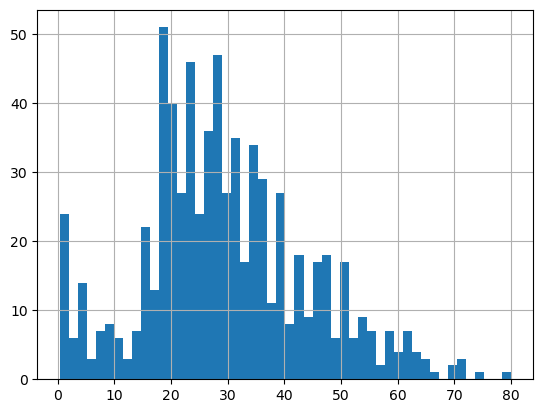

In [2]:
# Histogram
df.Age.hist(bins=50)

In [3]:
# In arbitary they usually take the last outliers 
def impute_nan(df,variable):
    df[variable+'_Zeros']=df[variable].fillna(0) # fill the nan value with zero
    df[variable+'_hundred']=df[variable].fillna(100) # fill the nan value with 100

In [4]:
impute_nan(df,'Age')

In [5]:
df

,Survived,Age,Fare,Age_Zeros,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


<Axes: >

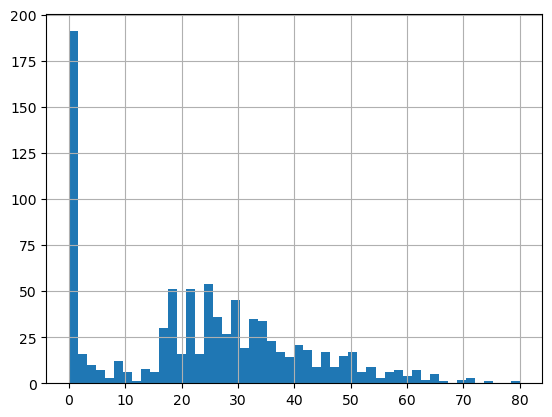

In [6]:
df.Age_Zeros.hist(bins=50)

<Axes: >

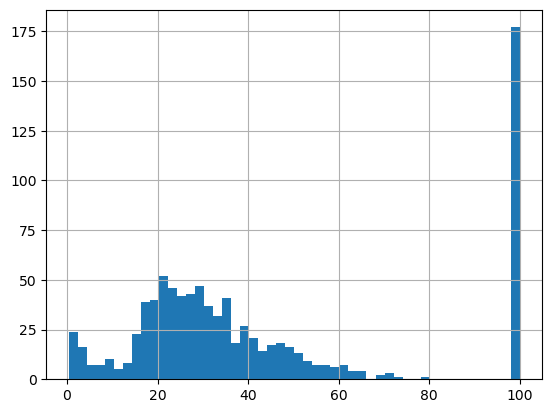

In [7]:
df.Age_hundred.hist(bins=50)

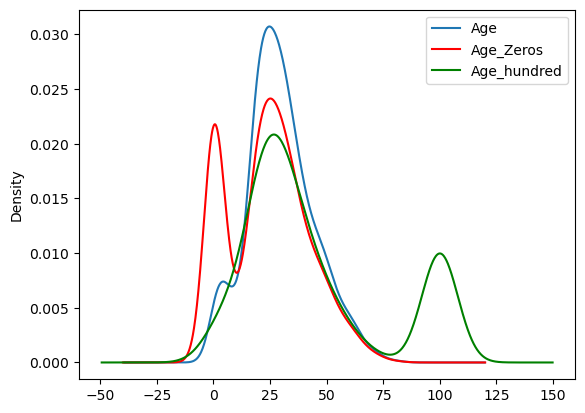

In [8]:
# Presentation
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_Zeros.plot(kind='kde',ax=ax,color='red')
df.Age_hundred.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages 

1. Easy to implement
2. Captures the importance of missingness , if there is any 

# Disadvantages

1. Distorts the original distribution of the variable
2. If missing ness is not important, It may mask the predictive power of the original variable by distorting it's distribution 
3. Hard to decide which value to use 

# Handle Categorical Missing values

# 1. Frequent Category imputation 

In [9]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [10]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [12]:
# Percentage of missing value
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [13]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [14]:
df.shape

(1460, 4)

In [15]:
# From the above features,  (BsmtQual,GarageType):- They are having less number of missing values , we replace with the most frequent category that are present in the BsmtQual,GarageType. 
# Replacing with the most frequent features , will not cause and distortion as we are replacing with the most frequent categories of same relation
## Compute the frequency with every feature
df.groupby(['BsmtQual'])

In [18]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<Axes: >

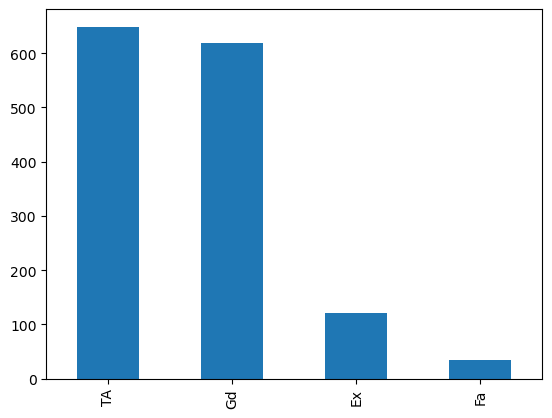

In [16]:
# First Way
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='BsmtQual'>

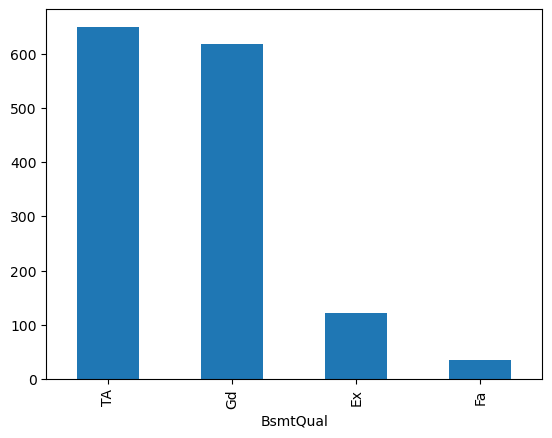

In [20]:
# Second way
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: >

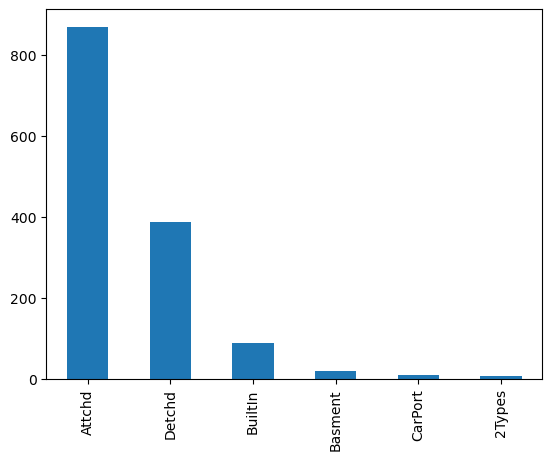

In [21]:
df['GarageType'].value_counts().plot.bar()

<Axes: >

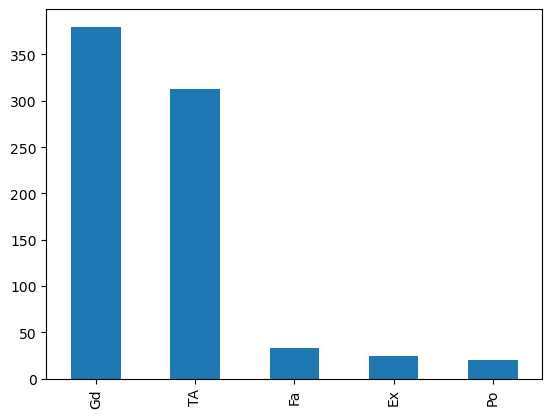

In [16]:
df['FireplaceQu'].value_counts().plot.bar()

In [22]:
# No of categories in a feature
df['BsmtQual'].value_counts().sort_values(ascending=True)


Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [23]:
df['BsmtQual'].value_counts().index

Index(['TA', 'Gd', 'Ex', 'Fa'], dtype='object')

In [24]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [26]:
df['BsmtQual'].mode()[0]

'TA'

In [27]:
df['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [28]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [29]:
df['GarageType'].mode()[0]

'Attchd'

In [30]:
df['FireplaceQu'].value_counts().index

Index(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype='object')

In [31]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [32]:
df['FireplaceQu'].mode()[0]

'Gd'

In [33]:
## Replacing function 
def impute_nan(df,variable): # we can use both mode and value count 
    most_frequent_category=df[variable].value_counts().index[0]  # First I need to findout which is the most frequent category of that feature
    df[variable].fillna(most_frequent_category,inplace=True) # fill NA with most frequent category
        

In [34]:
# create a loop
for features in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,features)


In [35]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


In [36]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# Advantages
1. Easy to implement
2. Faster way to implement

# Disadvantage
1. Since we are using the more frequent labels , It may use them in an over represented way , if there are many nan
2. It distorts the relation of the most frequent label

# 2. Adding a variable to capture NAN

In [38]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [39]:
# we going to create another feature which will  indicate whether the feature will be null or not
import numpy as np
# new column 
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0) # whereever there will be null , that will be zero

In [40]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [41]:
# Replace BsmtQual with most frequent categories
frequent=df['BsmtQual'].mode()[0] # frequent variable
df['BsmtQual'].mode()[0] # Most frequent categories 

'TA'

In [42]:
df['BsmtQual'].fillna(frequent,inplace=True) # fill with most frequent category

In [43]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0
1456,Gd,TA,Attchd,210000,0
1457,TA,Gd,Attchd,266500,0
1458,TA,NaN,Attchd,142125,0


In [38]:
# we have captured the importance of missing value over(BsmtQual_var) and fill (BsmtQual) with the most frequent features
# the disadvantage is that It will increase the feature space 
# If I do this continuously (increasing feature size ), this may be problem
# 

In [44]:
# new column 
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0) # whereever there will be null , that will be zero
# Replace FireplaceQu with most frequent categories
frequent=df['FireplaceQu'].mode()[0] # frequent variable
df['FireplaceQu'].fillna(frequent,inplace=True)

In [45]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0
1456,Gd,TA,Attchd,210000,0,0
1457,TA,Gd,Attchd,266500,0,0
1458,TA,Gd,Attchd,142125,0,1


In [41]:
# Sub part
# this is the most frequent technique
# SUppose if you have more frequent categories , we just replace NAN with a new category 


In [46]:
df=pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [50]:
def impute_nan(df,variable):
    df[variable+'_new_variable']=np.where(df[variable].isnull(),'Missing',df[variable]) 
    # I am going to create a new variable = df of whereever this variable is null , I am going to replace with 'missing' name which is a new category(missing/unknown)
    # wherever It is null , I am going to create a new category call missing 
    # If it is not null ,I have to replace it back with df[variable]

In [51]:
# create a loop
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [52]:
df # we are not replacing nan with any value, we are replacing with a variable(missing )

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_variable,FireplaceQu_new_variable,GarageType_new_variable
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd,TA,Attchd
1456,Gd,TA,Attchd,210000,Gd,TA,Attchd
1457,TA,Gd,Attchd,266500,TA,Gd,Attchd
1458,TA,Gd,Attchd,142125,TA,Gd,Attchd


In [53]:
df.isnull().sum()

BsmtQual                    0
FireplaceQu                 0
GarageType                  0
SalePrice                   0
BsmtQual_new_variable       0
FireplaceQu_new_variable    0
GarageType_new_variable     0
dtype: int64

In [54]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

,SalePrice,BsmtQual_new_variable,FireplaceQu_new_variable,GarageType_new_variable
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Gd,Attchd
